<a href="https://colab.research.google.com/github/pavan-kalyan47/X-Twitter-_API-_Sentimental_Analysis/blob/main/Sentiment_Analysis_and_Word_Cloud_Visualization_of_Tweets_on_ElonMusk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tweepy==4.9.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: tweepy
    Found existing installation: tweepy 4.14.0
    Uninstalling tweepy-4.14.0:
      Successfully uninstalled tweepy-4.14.0


In [2]:
import tweepy
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [4]:
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAOlCxgEAAAAArmEEdGxtYt1wkoSk7%2BnF9jANgVE%3DWEOqkyR5koP4buENlPd44V4UcyM85lthjhYzBBtXe8x3BHeO4U')

In [5]:
query = '#ElonMusk -is:retweet lang:en'

In [6]:
tweets_response = client.search_recent_tweets(
    query=query,
    max_results=100,  # Limit to 100 tweets
    tweet_fields=["text", "created_at", "lang"]
)

In [13]:
if tweets_response.data:
    for tweet in tweets_response.data:
        print(tweet.text)
else:
    print("No tweets found for the given query.")

@AltcoinDailyio The real diamond among memcoins is #opk. The super bullish narrative of this cycle. Who didn't buy it will bite the log! Remember this post later! #donaldtrump #memecoins #elonmusk https://t.co/B57OegQR06
XMail on the horizon! Elon hints at a new email service with "username@x.com (mailto:username@x.com)." Potential features: cloud storage, AI sorting, native payments. #XMail #ElonMusk #EmailRevolution #SleekDesign #ModernEmail #EmailInnovation #TechNews #ElonMuskUpdates https://t.co/VsQWOyo0Ns
🤣🤣🤣 Woefully out of touch ‘60 Minutes’ reporter #LesleyStahl admits worry about future of legacy media with Trump taking office again: ‘I’m very dark about it’ #DonaldTrump #ElonMusk #Presidentialelection
https://t.co/Xwp6X4WtwL
**Alert!**

Beware of fake messages! If you're receiving daily messages claiming to be from #ElonMusk, be cautious:

- Check if the profile is **#Verified**.
- Messages with errors or strange requests are **#Suspicious**.
- Legitimate communications come 

In [14]:
tweets_df = pd.DataFrame(tweets, columns=['text'])

In [18]:
tweets_df.head()

,text,cleaned_text,polarity,subjectivity
0,@AltcoinDailyio The real diamond among memcoin...,the real diamond among memcoins is opk the sup...,0.177778,0.322222
1,XMail on the horizon! Elon hints at a new emai...,xmail on the horizon elon hints at a new email...,0.068182,0.727273
2,🤣🤣🤣 Woefully out of touch ‘60 Minutes’ reporte...,woefully out of touch 60 minutes reporter lesl...,-0.097500,0.322500
3,**Alert!**\n\nBeware of fake messages! If you'...,alert beware of fake messages if you re receiv...,-0.183333,0.383333
4,@henokcrypto Join us on our mission to mars 🪐 ...,join us on our mission to mars already liked o...,0.425000,0.566667


In [15]:
def clean_tweet(tweet):
    """
    Cleans the tweet text by removing special characters, mentions, and unnecessary spaces.
    """
    tweet = tweet.lower()
    tweet = re.sub(r'RT @\w+: ', '', tweet)  # Remove RTs
    tweet = re.sub(r'(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet)  # Remove mentions, URLs, special chars
    tweet = re.sub(r'\s+', ' ', tweet).strip()  # Remove extra spaces
    return tweet

In [16]:
tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_tweet)

In [17]:
tweets_df[['polarity', 'subjectivity']] = tweets_df['cleaned_text'].apply(
    lambda text: pd.Series(TextBlob(text).sentiment)
)

In [19]:
sid = SentimentIntensityAnalyzer()
def classify_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [20]:
tweets_df['sentiment'] = tweets_df['cleaned_text'].apply(classify_sentiment)

In [21]:
tweets_df['compound'] = tweets_df['cleaned_text'].apply(lambda text: sid.polarity_scores(text)['compound'])
tweets_df['positive'] = tweets_df['cleaned_text'].apply(lambda text: sid.polarity_scores(text)['pos'])
tweets_df['neutral'] = tweets_df['cleaned_text'].apply(lambda text: sid.polarity_scores(text)['neu'])
tweets_df['negative'] = tweets_df['cleaned_text'].apply(lambda text: sid.polarity_scores(text)['neg'])

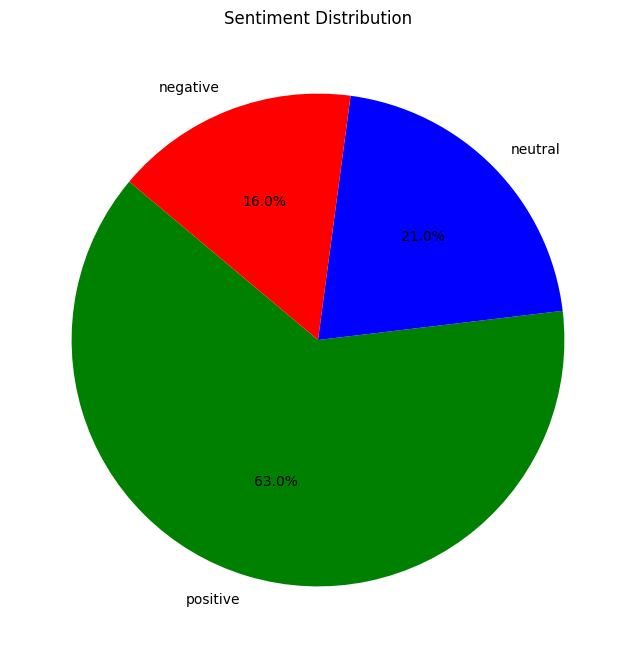

In [22]:
def plot_sentiment_distribution(data, column):
    sentiment_counts = data[column].value_counts()
    sentiment_percentages = sentiment_counts / sentiment_counts.sum() * 100

    plt.figure(figsize=(8, 8))
    plt.pie(
        sentiment_percentages,
        labels=sentiment_percentages.index,
        autopct='%1.1f%%',
        colors=['green', 'blue', 'red'],
        startangle=140
    )
    plt.title('Sentiment Distribution')
    plt.show()

plot_sentiment_distribution(tweets_df, 'sentiment')

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


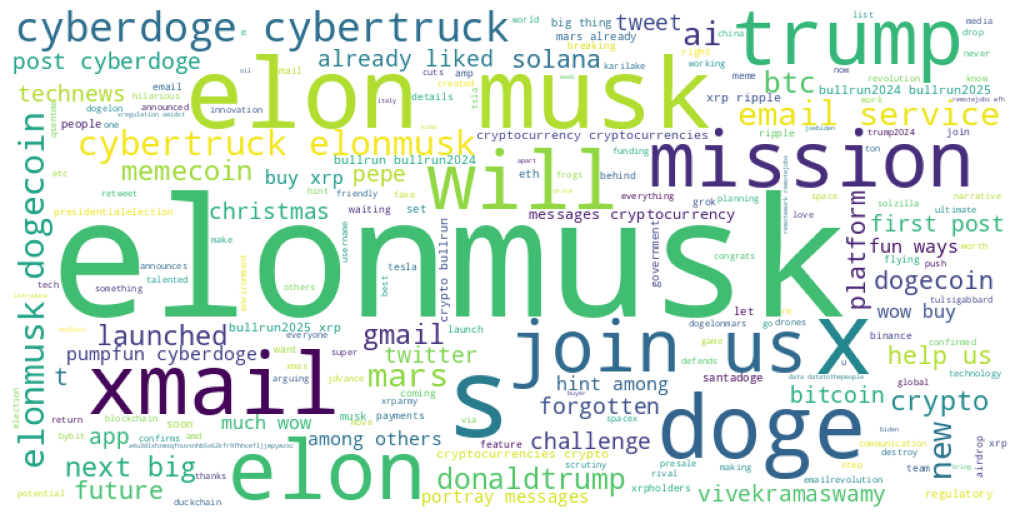

In [31]:
# Word Cloud Generation
all_tweets = " ".join(tweets_df['cleaned_text'])

wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=STOPWORDS).generate(all_tweets)

plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [32]:
tweets_df['text_length'] = tweets_df['cleaned_text'].apply(len)
tweets_df['word_count'] = tweets_df['cleaned_text'].apply(lambda x: len(x.split()))

In [33]:
avg_length = tweets_df.groupby('sentiment')['text_length'].mean().round(2)
avg_word_count = tweets_df.groupby('sentiment')['word_count'].mean().round(2)
print("Average Tweet Length by Sentiment:\n", avg_length)
print("\nAverage Word Count by Sentiment:\n", avg_word_count)

Average Tweet Length by Sentiment:
 sentiment
negative    162.12
neutral     102.10
positive    155.75
Name: text_length, dtype: float64

Average Word Count by Sentiment:
 sentiment
negative    24.69
neutral     15.38
positive    25.19
Name: word_count, dtype: float64


In [36]:
output_path = '/content/drive/My Drive/sentiment_analysis_output.csv'
tweets_df.to_csv(output_path, index=False)
print(f"DataFrame saved to {output_path}")

DataFrame saved to /content/drive/My Drive/sentiment_analysis_output.csv


In [37]:
tweets_df.head()

,text,cleaned_text,polarity,subjectivity,sentiment,compound,positive,neutral,negative,text_length,word_count
0,@AltcoinDailyio The real diamond among memcoin...,the real diamond among memcoins is opk the sup...,0.177778,0.322222,positive,0.7430,0.189,0.811,0.000,172,30
1,XMail on the horizon! Elon hints at a new emai...,xmail on the horizon elon hints at a new email...,0.068182,0.727273,neutral,0.0000,0.000,1.000,0.000,248,33
2,🤣🤣🤣 Woefully out of touch ‘60 Minutes’ reporte...,woefully out of touch 60 minutes reporter lesl...,-0.097500,0.322500,negative,-0.5267,0.069,0.755,0.176,191,29
3,**Alert!**\n\nBeware of fake messages! If you'...,alert beware of fake messages if you re receiv...,-0.183333,0.383333,negative,-0.7906,0.050,0.698,0.252,239,37
4,@henokcrypto Join us on our mission to mars 🪐 ...,join us on our mission to mars already liked o...,0.425000,0.566667,positive,0.6124,0.263,0.737,0.000,98,16
